In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [11, 4]

In [2]:
def basic_plot(df, x_axis, y_axis, title):
    df.plot()
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.legend()

In [3]:
def plot_by_date(df, group_col, date_col, x_axis, y_axis, title):
    new_df = df[[group_col, date_col]].value_counts().reset_index().pivot(columns=group_col, index=date_col)
    basic_plot(new_df, x_axis, y_axis, title)

In [4]:
# set filepaths (3 files)
uof_csv = '../data/Use_of_force_CPD.csv'

In [5]:
uof_df = pd.read_csv(uof_csv)


In [6]:
uof_df.shape

(32068, 61)

In [7]:
uof_df.head(10)

,CPD_MEMBER,DATE,MEMRESP_CT_ARMBAR_I,MEMRESP_CT_CONT_INSTRUMENT_I,MEMRESP_CT_EMER_HANDCUFF_I,MEMRESP_CT_ESCORT_HOLD_I,MEMRESP_CT_PRESS_SENSITIVE_I,MEMRESP_CT_WRISTLOCK_I,MEMRESP_FIREARM_I,MEMRESP_FM_ADDITION_UNIT_I,...,COMMUNITY_AREA,DISTRICT,MEMRESP_FM_NONE_I,MEMRESP_RWW_SHOTGUN_I,MEMRESP_RWW_TASER_I,MEMRESP_TAKEDOWN_EMERGHAND_I,MEMRESP_VERBAL_COMMANDS_I,SUBJECT_ARMED_DESC,SUBJECT_ARMED_I,WARD
0,20830.0,9/5/2017,N,N,NaN,Y,N,Y,N,NaN,...,43.0,3,NaN,NaN,N,Y,Y,NaN,NaN,5.0
1,110989.0,3/5/2016,N,N,NaN,Y,N,N,N,NaN,...,1.0,24,NaN,NaN,N,N,Y,NaN,NaN,49.0
2,110989.0,10/5/2017,Y,N,NaN,Y,N,N,N,NaN,...,2.0,24,NaN,NaN,N,Y,Y,NaN,NaN,50.0
3,126722.0,9/23/2020,N,N,N,N,N,N,NaN,Y,...,3.0,20,N,N,N,NaN,NaN,NaN,N,46.0
4,250212.0,2/7/2019,N,N,N,N,N,N,NaN,N,...,16.0,17,N,N,N,NaN,NaN,NaN,N,33.0
5,251296.0,2/7/2019,N,N,N,N,N,N,NaN,N,...,16.0,17,N,N,N,NaN,NaN,NaN,N,33.0
6,341330.0,5/11/2015,N,N,NaN,N,N,N,N,NaN,...,60.0,9,NaN,NaN,Y,N,Y,NaN,NaN,11.0
7,364271.0,2/10/2018,Y,N,N,Y,N,N,NaN,Y,...,31.0,12,N,N,N,NaN,NaN,NaN,N,25.0
8,498239.0,2/11/2021,N,N,N,N,N,N,NaN,N,...,8.0,18,N,N,N,NaN,NaN,NaN,N,42.0
9,518621.0,1/21/2018,N,N,N,Y,N,N,NaN,Y,...,8.0,18,N,N,N,NaN,NaN,NaN,N,42.0


In [8]:
uof_df.columns

Index(['CPD_MEMBER', 'DATE', 'MEMRESP_CT_ARMBAR_I',
       'MEMRESP_CT_CONT_INSTRUMENT_I', 'MEMRESP_CT_EMER_HANDCUFF_I',
       'MEMRESP_CT_ESCORT_HOLD_I', 'MEMRESP_CT_PRESS_SENSITIVE_I',
       'MEMRESP_CT_WRISTLOCK_I', 'MEMRESP_FIREARM_I',
       'MEMRESP_FM_ADDITION_UNIT_I', 'MEMRESP_FM_MEM_PRESENCE_I',
       'MEMRESP_FM_MOVE_AVOID_I', 'MEMRESP_FM_SPEC_UNIT_I',
       'MEMRESP_FM_TACT_POSITION_I', 'MEMRESP_FM_VERBAL_DIR_CONTROL_I',
       'MEMRESP_FM_ZONE_SAFETY_I', 'MEMRESP_IMPACT_WEAP_I',
       'MEMRESP_RWOW_CLOSED_HAND_I', 'MEMRESP_RWOW_ELBOW_STR_I',
       'MEMRESP_RWOW_KICKS_I', 'MEMRESP_RWOW_KNEE_STRIKE_I',
       'MEMRESP_RWOW_OPEN_HAND_I', 'MEMRESP_RWOW_TAKEDOWN_I',
       'MEMRESP_RWW_BATON_I', 'MEMRESP_RWW_CANINE_I',
       'MEMRESP_RWW_IMPACT_MUN_I', 'MEMRESP_RWW_LRAD_I',
       'MEMRESP_RWW_OC_CHEM_AUTH_I', 'MEMRESP_RWW_OC_CHEM_I',
       'MEMRESP_RWW_REVOLVER_I', 'MEMRESP_RWW_RIFLE_I',
       'MEMRESP_RWW_SEMIAUTO_I', 'RD_NO', 'SUBAC_ATT_MEM_WEAP_I',
       'SUBAC_ATT

In [9]:
# conver to datetime
uof_df['DATETIME'] = pd.to_datetime(uof_df['DATE'])

In [10]:
uof_df['YEAR'] = uof_df['DATETIME'].dt.year

In [11]:
uof_df['DATE'] = uof_df['DATETIME'].dt.date

In [12]:
uof_df['MONTHYEAR'] = uof_df['DATETIME'].dt.to_period('M')

In [13]:
print('DATE RANGE:', uof_df['DATETIME'].min(), uof_df['DATETIME'].max())

DATE RANGE: 2015-01-01 00:00:00 2021-03-31 00:00:00


In [14]:
# limit to 2016-2019
uof_df = uof_df[uof_df['YEAR'].between(2016, 2019)]

In [15]:
print('DATE RANGE:', uof_df['DATETIME'].min(), uof_df['DATETIME'].max())

DATE RANGE: 2016-01-01 00:00:00 2019-12-31 00:00:00


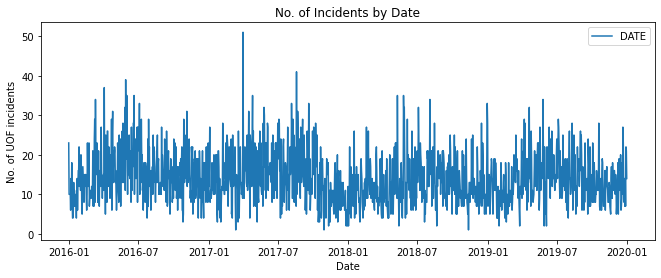

In [16]:
basic_plot(uof_df['DATE'].value_counts(), 'Date', 'No. of UOF incidents', 'No. of Incidents by Date')

In [17]:
dup_ids = uof_df['TRR_REPORT_ID'].value_counts()[uof_df['TRR_REPORT_ID'].value_counts()>1].reset_index()['index']
dup_ids

0    633860
1    393001
2    507714
Name: index, dtype: int64

In [18]:
# check report id for duplicates
for id in dup_ids:
    df = uof_df[uof_df['TRR_REPORT_ID'] == id][['TRR_REPORT_ID', 'CPD_MEMBER', 'DATE', 'SUBJECT_GENDER', 'SUBJECT_RACE',
       'Year of SUBJECT_BIRTH']]
    print(df)

       TRR_REPORT_ID  CPD_MEMBER        DATE SUBJECT_GENDER    SUBJECT_RACE  \
28562         633860    330524.0  2017-09-07           MALE  WHITE HISPANIC   
28563         633860    330524.0  2018-09-07           MALE  WHITE HISPANIC   

       Year of SUBJECT_BIRTH  
28562                 1978.0  
28563                 1978.0  
       TRR_REPORT_ID  CPD_MEMBER        DATE SUBJECT_GENDER      SUBJECT_RACE  \
22280         393001    854749.0  2016-12-06           MALE  AFRICAN-AMERICAN   
22281         393001    854749.0  2017-12-07           MALE  AFRICAN-AMERICAN   

       Year of SUBJECT_BIRTH  
22280                 1991.0  
22281                 1991.0  
       TRR_REPORT_ID  CPD_MEMBER        DATE SUBJECT_GENDER SUBJECT_RACE  \
31403         507714    464074.0  2017-10-10        UNKNOWN      UNKNOWN   
31404         507714    464074.0  2018-04-26        UNKNOWN      UNKNOWN   

       Year of SUBJECT_BIRTH  
31403                    NaN  
31404                    NaN  


In [19]:
# Sort by date of record modification (descending)
uof_df = uof_df.sort_values(by='DATETIME', ascending=False)
# Keep only most recent record per card number
uof_df = uof_df.drop_duplicates(subset = 'TRR_REPORT_ID')

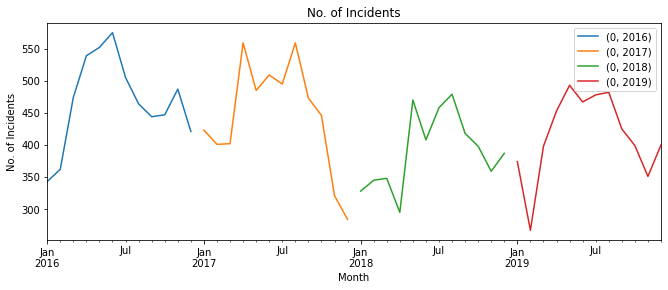

In [20]:
plot_by_date(uof_df, 'YEAR', 'MONTHYEAR', 'Month', 'No. of Incidents','No. of Incidents')

In [21]:
uof_df.columns

Index(['CPD_MEMBER', 'DATE', 'MEMRESP_CT_ARMBAR_I',
       'MEMRESP_CT_CONT_INSTRUMENT_I', 'MEMRESP_CT_EMER_HANDCUFF_I',
       'MEMRESP_CT_ESCORT_HOLD_I', 'MEMRESP_CT_PRESS_SENSITIVE_I',
       'MEMRESP_CT_WRISTLOCK_I', 'MEMRESP_FIREARM_I',
       'MEMRESP_FM_ADDITION_UNIT_I', 'MEMRESP_FM_MEM_PRESENCE_I',
       'MEMRESP_FM_MOVE_AVOID_I', 'MEMRESP_FM_SPEC_UNIT_I',
       'MEMRESP_FM_TACT_POSITION_I', 'MEMRESP_FM_VERBAL_DIR_CONTROL_I',
       'MEMRESP_FM_ZONE_SAFETY_I', 'MEMRESP_IMPACT_WEAP_I',
       'MEMRESP_RWOW_CLOSED_HAND_I', 'MEMRESP_RWOW_ELBOW_STR_I',
       'MEMRESP_RWOW_KICKS_I', 'MEMRESP_RWOW_KNEE_STRIKE_I',
       'MEMRESP_RWOW_OPEN_HAND_I', 'MEMRESP_RWOW_TAKEDOWN_I',
       'MEMRESP_RWW_BATON_I', 'MEMRESP_RWW_CANINE_I',
       'MEMRESP_RWW_IMPACT_MUN_I', 'MEMRESP_RWW_LRAD_I',
       'MEMRESP_RWW_OC_CHEM_AUTH_I', 'MEMRESP_RWW_OC_CHEM_I',
       'MEMRESP_RWW_REVOLVER_I', 'MEMRESP_RWW_RIFLE_I',
       'MEMRESP_RWW_SEMIAUTO_I', 'RD_NO', 'SUBAC_ATT_MEM_WEAP_I',
       'SUBAC_ATT

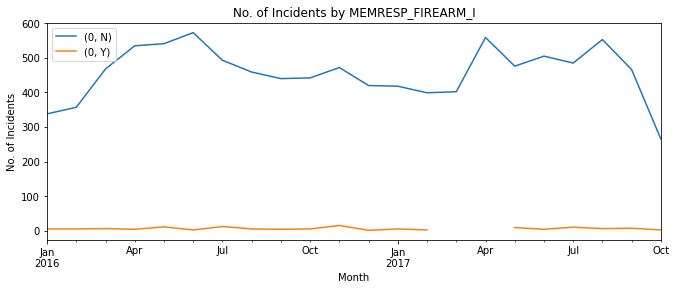

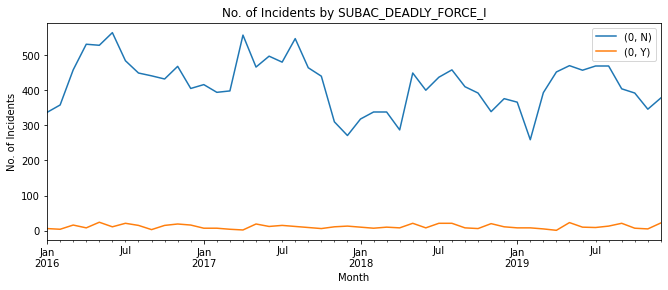

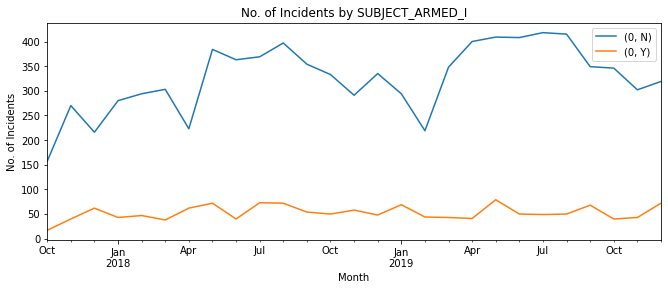

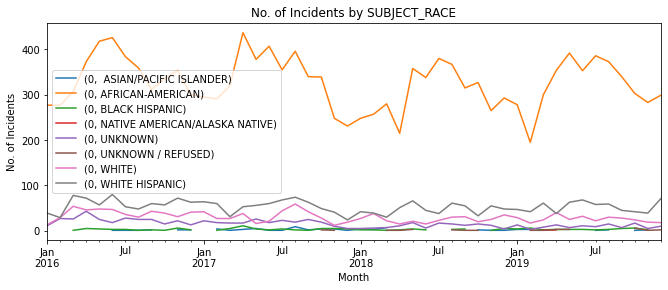

In [22]:
# Look at a few trends over time for different variables in the data
cols = ['MEMRESP_FIREARM_I', 'SUBAC_DEADLY_FORCE_I', 'SUBJECT_ARMED_I', 'SUBJECT_RACE']
for col_of_interest in cols:
    plot_by_date(uof_df, col_of_interest, 'MONTHYEAR', 'Month', 'No. of Incidents', f'No. of Incidents by {col_of_interest}')

## Create features at the beat/year level

In [23]:
# enter categ columns to use - any others?
categ_cols = ['SUBJECT_RACE', 'SUBJECT_GENDER', 'SUBJECT_ARMED_DESC']

In [24]:
dummy_cols = pd.get_dummies(uof_df[categ_cols], columns = categ_cols, prefix = categ_cols).columns

In [25]:
uof_df = pd.get_dummies(uof_df, columns = categ_cols, prefix = categ_cols)

In [26]:
uof_df['TOTAL_COUNT'] = 1

In [27]:
# enter binary cols to use - any others?
binary_cols = ['TOTAL_COUNT', 
               'MEMRESP_FIREARM_I', 
               'MEMRESP_CT_EMER_HANDCUFF_I',
               'MEMRESP_IMPACT_WEAP_I',
               'SUBAC_DEADLY_FORCE_I', 
               'SUBJECT_ARMED_I',
               'SUBAC_ATTACK_NW_I',
               'SUBAC_ATTACK_WW_I']

In [28]:
# convert from y/n to 1/0
for col in binary_cols:
    uof_df[col] = np.where(uof_df[col]=='Y',1,uof_df[col])
    uof_df[col] = np.where(uof_df[col]=='N',0,uof_df[col])   

In [29]:
# combine into one list
binary_cols.extend(dummy_cols)
binary_cols

['TOTAL_COUNT',
 'MEMRESP_FIREARM_I',
 'MEMRESP_CT_EMER_HANDCUFF_I',
 'MEMRESP_IMPACT_WEAP_I',
 'SUBAC_DEADLY_FORCE_I',
 'SUBJECT_ARMED_I',
 'SUBAC_ATTACK_NW_I',
 'SUBAC_ATTACK_WW_I',
 'SUBJECT_RACE_ ASIAN/PACIFIC ISLANDER',
 'SUBJECT_RACE_AFRICAN-AMERICAN',
 'SUBJECT_RACE_BLACK HISPANIC',
 'SUBJECT_RACE_NATIVE AMERICAN/ALASKA NATIVE',
 'SUBJECT_RACE_UNKNOWN',
 'SUBJECT_RACE_UNKNOWN / REFUSED',
 'SUBJECT_RACE_WHITE',
 'SUBJECT_RACE_WHITE HISPANIC',
 'SUBJECT_GENDER_FEMALE',
 'SUBJECT_GENDER_MALE',
 'SUBJECT_GENDER_UNKNOWN',
 'SUBJECT_ARMED_DESC_BLUNT WEAPON',
 'SUBJECT_ARMED_DESC_CHEMICAL WEAPON',
 'SUBJECT_ARMED_DESC_EXPLOSIVE DEVICE',
 'SUBJECT_ARMED_DESC_KNIFE / CUTTING INSTRUMENT',
 'SUBJECT_ARMED_DESC_OTHER (DESCRIBE)',
 'SUBJECT_ARMED_DESC_REVOLVER',
 'SUBJECT_ARMED_DESC_RIFLE',
 'SUBJECT_ARMED_DESC_SEMI-AUTO PISTOL',
 'SUBJECT_ARMED_DESC_TASER / STUN GUN',
 'SUBJECT_ARMED_DESC_VEHICLE']

In [30]:
uof_beat_yr = uof_df.groupby(['DISTRICT', 'BEAT', 'YEAR'])[binary_cols].sum().reset_index()
uof_beat_yr

,DISTRICT,BEAT,YEAR,TOTAL_COUNT,SUBJECT_RACE_ ASIAN/PACIFIC ISLANDER,SUBJECT_RACE_AFRICAN-AMERICAN,SUBJECT_RACE_BLACK HISPANIC,SUBJECT_RACE_NATIVE AMERICAN/ALASKA NATIVE,SUBJECT_RACE_UNKNOWN,SUBJECT_RACE_UNKNOWN / REFUSED,...,SUBJECT_ARMED_DESC_BLUNT WEAPON,SUBJECT_ARMED_DESC_CHEMICAL WEAPON,SUBJECT_ARMED_DESC_EXPLOSIVE DEVICE,SUBJECT_ARMED_DESC_KNIFE / CUTTING INSTRUMENT,SUBJECT_ARMED_DESC_OTHER (DESCRIBE),SUBJECT_ARMED_DESC_REVOLVER,SUBJECT_ARMED_DESC_RIFLE,SUBJECT_ARMED_DESC_SEMI-AUTO PISTOL,SUBJECT_ARMED_DESC_TASER / STUN GUN,SUBJECT_ARMED_DESC_VEHICLE
0,0,0,2016,20,0,17,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2017,16,1,13,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,111,2016,28,0,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,111,2017,33,0,22,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,111,2018,25,0,22,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,25,2535,2019,13,0,7,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1079,31,3100,2016,19,1,13,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1080,31,3100,2017,28,0,21,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1081,31,3100,2018,15,0,9,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0


In [31]:
uof_beat_yr.to_csv('../data/features/use_of_force.csv')